Suppose we have a circuit consisting of:
* A voltage source u(t)
* A resistor, R
* A capacitor C

In [3]:
from sympy import *
u,vr, vc, i = symbols("u vr vc i" , cls=Function)
R,C, t = symbols("R C t", positive=True)

Kirchhoff's voltage law is:

In [8]:
kvl = u(t) - i(t) * R - (1/C) * Integral( i(t), (t, 0, t))
kvl

-R*i(t) + u(t) - Integral(i(t), (t, 0, t))/C

We can differentiate everything to get rid of the integral

In [10]:
ode = kvl.diff(t)
ode

-R*Derivative(i(t), t) + Derivative(u(t), t) - i(t)/C

We can now pick a specific input function, eg. u(t) = sin(t)

In [16]:
odeSin = ode.subs({u(t): sin(t)}).simplify()
odeSin

-R*Derivative(i(t), t) + cos(t) - i(t)/C

And get sympy to solve for i(t)

In [38]:
answer = dsolve(odeSin, ics={i(0):0})
answer

Eq(i(t), C**2*R*sin(t)/(C**2*R**2 + 1) + C*cos(t)/(C**2*R**2 + 1) - C*exp(-t/(C*R))/(C**2*R**2 + 1))

The exponential term at the right will quickly die out, and we'll be left with the sum of a sin term (ie. in phase with the input voltage) and a cos term (leading the input voltage by ninety degrees).

When C is big relative to R, the sin term dominates.

Let's pick some actual values of R and C.  With tiny C and big R we're essentially "all cosine"

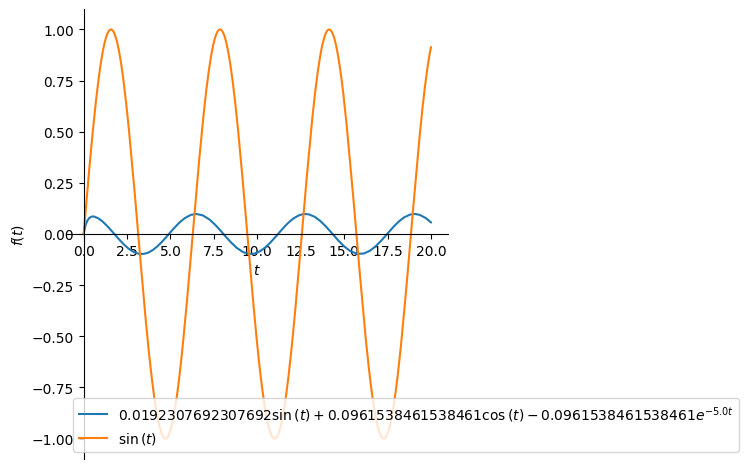

In [75]:
actuals = answer.subs({C:0.1, R:2}).simplify()
p1 = plot(actuals.rhs, (t, 0, 20), show=False, legend=True)
p2 = plot(sin(t), (t, 0, 20), show=False)
p1.append(p2[0])
p1.show()

Trig identities already tell us that when we sum Asin(t) + Bcos(t) we get sin(t + $\theta$) where $\theta$ = atan(A/B), and sympy knows some cases

In [82]:
trigsimp( sin(t) + cos(t))

sqrt(2)*sin(t + pi/4)